Load images

In [2]:
from skimage.io import imread_collection
from skimage.io import concatenate_images

images = imread_collection('track1_IMG/center*.jpg')
image_array = concatenate_images(images)

In [3]:
import numpy as np
from numpy import genfromtxt
file_data = genfromtxt('track1_driving_log.csv', delimiter=',')

In [12]:
import random
index = random.randint(0, len(image_array))
angle = file_data[...,3]
angle[index]

-0.21568619999999999

Angle of  -0.2156862
Image at index:  772


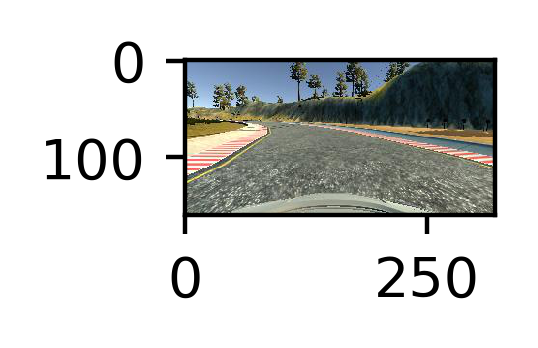

In [13]:
# Visualize the images### Data exploration visualization goes here.
import matplotlib.pyplot as plt
#import skimage
# Visualizations will be shown in the notebook.
%matplotlib inline

image = image_array[index]

plt.figure(figsize=(1,1),dpi=400)
plt.imshow(image)
print("Angle of ",angle[index])
print("Image at index: ", index)

In [14]:
# Angles not in degress but from -1 to 1 where 1 = 25 degrees
print(angle[index])
print(angle.shape)
print(angle.dtype)

-0.2156862
(1976,)
float64


In [15]:
def normalizer(array, min_max=(0,1), feature_range=(0, 1)):
    x_min = feature_range[0]
    x_max = feature_range[1]
    a = min_max[0]
    b = min_max[1]
    norm_features = (array-x_min)*(b-a)/(x_max - x_min) + a
    return norm_features

In [16]:
# Normalize the image channels to between 0 and 1
normalized_image_array = normalizer(image_array, min_max=(0,1), feature_range=(0,255))

In [17]:
# Normalize the steering angles to between -0.5 and 0.5. They are currently recorded to between -1.0 and 1.0
angle_nomalized = normalizer(angle, min_max=(-0.5,0.5), feature_range=(-1.0,1.0))
print(min(angle_nomalized))
print(min(angle))
print(angle_nomalized.shape)

-0.18046475
-0.3609295
(1976,)
